# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2023

# Prova 1 - 19/10/2023

### Profa. Roseli A. F. Romero

### Monitor: Roseval Malaquias Jr.

Alunos:


1.   Gabriel de Avelar Las Casas Rebelo (11800462)
2.   Renan de Almeida Leandro (11801157)

# **Parte 1**

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

# Questão 1
- a) Remova os dados faltantes que aparece neste conjunto como "?" (1 pt)
- b) Reduza o número de atributos escolhendo os 3 mais relevantes. Justifique sua resposta. (1 pt)
- c) Comente a distribuição dos valores de **um** dos atributos selecionados. Escolha uma forma de visualização (ex: histograma ou boxplot) (1 pt)
- d) Calcule a obliquidade para uma das 3 variáveis mais relevantes e comente. (1 pt)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
breastcancer = pd.read_csv('/content/drive/MyDrive/breast-cancer-wisconsin.data', na_values='?')

missing_values = breastcancer.isnull().sum()
print("1. Quantidade de Valores Faltantes:")
print(missing_values)

breastcancer_cleaned = breastcancer.dropna()
print('-------------------------------------------------')
check_missing_values = breastcancer_cleaned.isnull().sum()
print("1. Conferindo que todos os valores nulls foram removidos:")
print(check_missing_values)

1. Quantidade de Valores Faltantes:
id                  0
clump_thickness     0
u_cell_size         0
u_cell_shape        0
marg_adhesion       0
epi_cell_size       0
bare_nuclei        16
bland_chrom         0
norm_nucl           0
mitoses             0
class               0
dtype: int64
-------------------------------------------------
1. Conferindo que todos os valores nulls foram removidos:
id                 0
clump_thickness    0
u_cell_size        0
u_cell_shape       0
marg_adhesion      0
epi_cell_size      0
bare_nuclei        0
bland_chrom        0
norm_nucl          0
mitoses            0
class              0
dtype: int64


## Escolhemos os atributos com maior correlação com a variável classe

In [ ]:
# Calcula a matriz de correlacao
correlations = breastcancer_cleaned.corrwith(breastcancer_cleaned['class'])

# Organiza em ordem descrescente
sorted_correlations = correlations.abs().sort_values(ascending=False)

#Seleciona os 3 com maior correlação
top_3_correlations = sorted_correlations[1:4]

top_3_correlations.head()


bare_nuclei     0.822696
u_cell_shape    0.821891
u_cell_size     0.820801
dtype: float64

## Escolhendo a visualzação pelo histograma por ser mais adequado para observar a frequência e formato dos dados

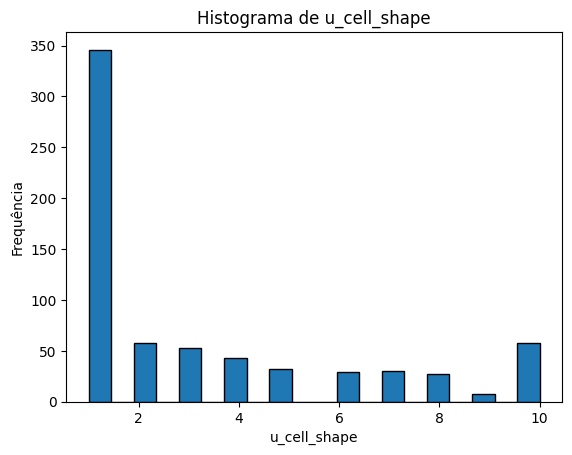

In [ ]:
import matplotlib.pyplot as plt

variable = top_3_correlations.index[1]  # Selecionando a coluna 'u_cell_shape' como atributo a ser visualizado

# Create a histogram for the selected variable
plt.hist(breastcancer_cleaned[variable], bins=20, edgecolor='k')
plt.xlabel(variable)
plt.ylabel('Frequência')
plt.title(f'Histograma de {variable}')
plt.show()


## Calculando a obliquidade da variável escolhida teremos um valor positivo e, assim, podemos perceber que ela é condizente com o histograma

In [ ]:
import scipy.stats as stats

print(f"Obliquidade: {stats.skew(breastcancer_cleaned[variable])}")

Obliquidade: 1.1553455087111262


# Questão 2
- a) Considerando os 10 atributos originais (sem o atributo classe), reduza a dimensionalidade dos dados usando a técnica PCA, mantendo uma variância acima de 90%. (1 pt)
- b) Quantos componentes são necessários para manter a variância de 90%? (1 pt)

## Antes de aplicarmos o PCA temos de normalizar os dados da seguinte forma

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

#fazendo uma copia para nao modificar o original e lançando fora o atributo de 'classe'
dfbackup = breastcancer_cleaned.copy()
dfbackup = dfbackup.drop(columns = ['class'])

#estabelecendo a forma de preprocessamento
scaler = StandardScaler()

# Iterando pelas colunas fazendo as modificações nos valores numéricos
for col in dfbackup.columns:
    dfbackup[col] = scaler.fit_transform(dfbackup[[col]])

print(dfbackup)

           id  clump_thickness  u_cell_size  u_cell_shape  marg_adhesion  \
0   -0.123664         0.197905    -0.702212     -0.741774      -0.639366   
1   -0.118956         0.197905     0.277252      0.262783       0.758032   
2   -0.098833        -0.511643    -0.702212     -0.741774      -0.639366   
3   -0.097459         0.552679     1.583204      1.602192      -0.639366   
4   -0.096256        -0.156869    -0.702212     -0.741774       0.059333   
..        ...              ...          ...           ...            ...   
694 -0.483732        -0.511643    -0.702212     -0.741774      -0.639366   
695 -0.378838        -0.866417    -0.702212     -0.741774      -0.639366   
696 -0.302972         0.197905     2.236180      2.271896       0.059333   
697 -0.289023        -0.156869     1.583204      0.932487       0.408682   
698 -0.289023        -0.156869     1.583204      1.602192       0.758032   

     epi_cell_size  bare_nuclei  bland_chrom  norm_nucl   mitoses  
0        -0.555608 

In [ ]:
from sklearn.decomposition import PCA

# Inicializa-se o PCA com o número de componentes igual ao número de atributos originais (10)
pca = PCA(n_components=10)

# Ajuste o PCA aos seus dados
pca.fit(dfbackup)

# Determina-se a variância explicada cumulativa
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Encontra-se o número de componentes necessários para manter uma variância de 90% ou mais
n_components_90 = (explained_variance_ratio >= 0.90).argmax() + 1

# Reduze-se a dimensionalidade dos dados para o número de componentes encontrados
df_reduced = pca.transform(dfbackup)[:, :n_components_90]
print(f"Número de componentes necessários para manter 90% de variância: {n_components_90}")


Número de componentes necessários para manter 90% de variância: 6


# **Parte 2**
Nos próximos exercícios utilizaremos um dataset com 13 variáveis de entrada e 1 variável de saída (num). O dataset pode ser encontrado no arquivo "clv_heart_disease.csv".
Existem valores faltantes nesse dataset, representados pelo caractere "?".

# Questão 3

- a) Crie uma lista com o nome das variáveis numéricas e uma com o nome das variáveis categóricas
* b) **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média.

- c) **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia da moda (valor mais frequente).

In [ ]:
heartdisease = pd.read_csv('/content/drive/MyDrive/clv_heart_disease.data', na_values='?')
missing_values = heartdisease.isnull().sum()
print("1. Quantidade de Valores Faltantes:")
print(missing_values)

heartdisease.info()
heartdisease.head()

1. Quantidade de Valores Faltantes:
Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    float64
 2   sex         303 non-null    object 
 3   cp          303 non-null    object 
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    float64
 7   restecg     303 non-null    object 
 8   thalach     303 non-null    float64
 9   exang       303 non-null    object 
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    object 
 12  ca          299 non-null   

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


In [ ]:
dfbackup = heartdisease.copy()

#estabelecendo a forma de imputação
imputernum = SimpleImputer(missing_values= np.nan, strategy='mean')
imputercat = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

numeric_variables = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']
categorical_variables = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'num']

# Iterando pelas colunas fazendo as modificações nos valores numéricos
for col in numeric_variables:
    dfbackup[col] = imputernum.fit_transform(heartdisease[[col]])  # Seleciona um DataFrame com uma unica coluna (2D)

# Iterando pelas colunas fazendo as modificações nos valores categóricos
for col in categorical_variables:
    dfbackup[col] = imputercat.fit_transform(heartdisease[[col]])

dfbackup.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0.0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1.0
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1.0
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0.0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0.0


# Questão 4


Entre os atributos numericos presentes nesta base de dados, existe alguns que possuem outliers? Justifique sua resposta.

Sim eles possuem outliers e estão marcados como losangulos vermelhos

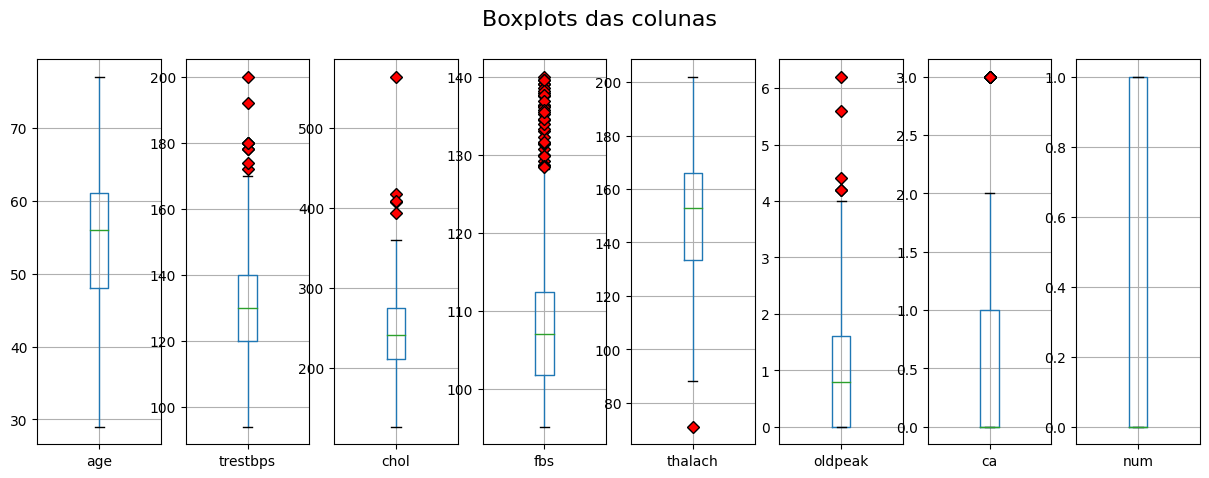

In [ ]:
import matplotlib.pyplot as plt

heartdisease_numericals = heartdisease[numeric_variables]

red_diamond = dict(markerfacecolor='r', marker='D')

# Cria um boxplot para cada coluna do dataframe
fig, axes = plt.subplots(nrows=1, ncols=len(heartdisease_numericals.columns), figsize=(15, 5))  # Cria subplots para cada coluna

for i, column in enumerate(heartdisease_numericals):
    heartdisease_numericals.boxplot(column=column, flierprops=red_diamond, ax=axes[i])

fig.suptitle('Boxplots das colunas', fontsize=16)

plt.show()

# Questão 5
 Considerando o atributo **chol**, responda:
- a) Qual é a media de cholestorol que esta amostra apresenta?
- b) Calcule os 4 momentos e comente os valores observados. Indique em qual faixa de valores a maioria de pessoas desta amostra está  incluída.

## O valor médio de cholesterol está elencado abaixo

In [ ]:
heartdisease_numericals['chol'].mean()

246.69306930693068